Missing values:
age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


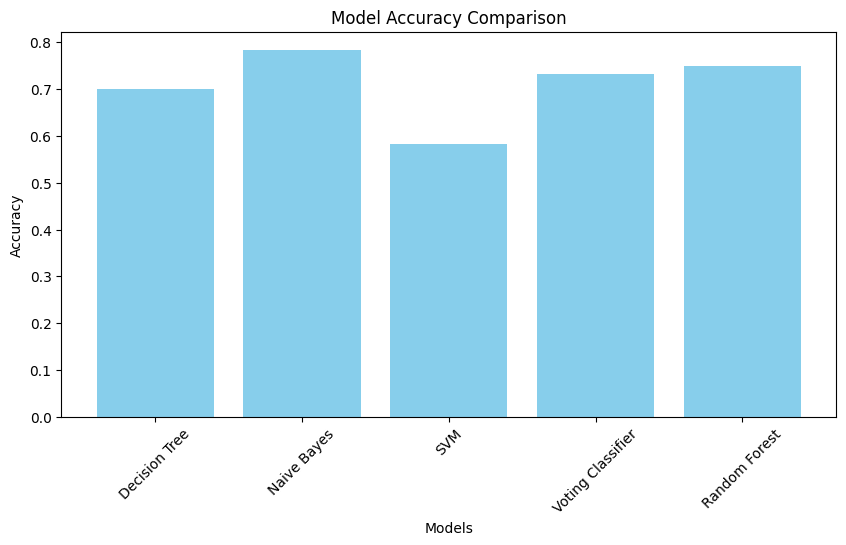

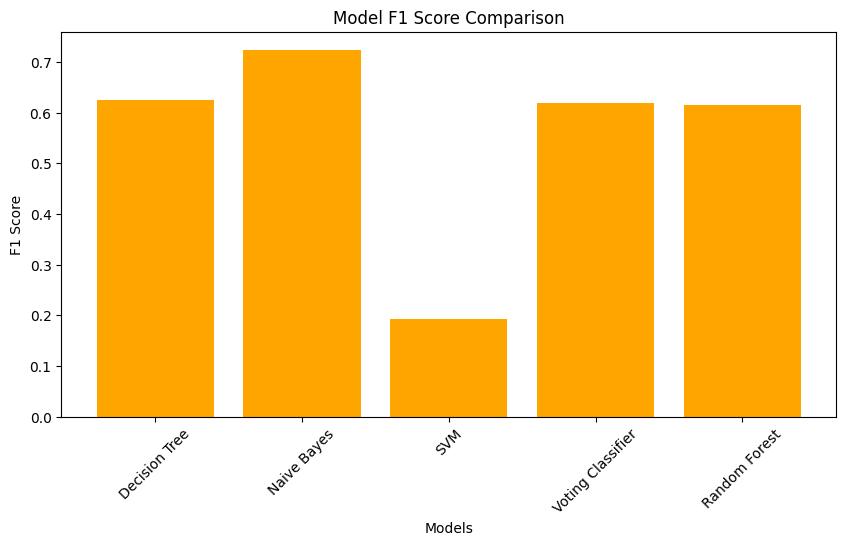

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("classif_heartfail.csv")

# Missing value analysis
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

# Drop missing values
df = df.dropna()

# Normalization - norm for tree based only use if knn or svm


# Encoding
label_encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = label_encoder.fit_transform(df[col])

# Outlier analysis - Box plot didnt do coz classification focus on predicting categorical labels instead on Box plots are typically used for visualizing the distribution of numerical variables
# boxplot = df.boxplot(figsize=(10,8))

# Linearity analysis - dont need coz Correlation matrices are primarily used to understand the linear relationships between numerical variables in a dataset
# correlation_matrix = df.corr()


# Class imbalance Analysis with SMOTE
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

win_counts = y_train.value_counts()
print("Count of Wins:")
print(win_counts)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

win_counts = y_train_res.value_counts()
print("Count of Wins:")
print(win_counts)

# Basic model implementation
# Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_res, y_train_res)
dt_pred = dt_classifier.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_f1 = f1_score(y_test, dt_pred)
print("Accuracy : ", dt_accuracy) #Proportion of correctly classified instances out of total instances
print("F1 : ", dt_f1) # Harmonic mean of precision and recall offering a balanced metric
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_pred))
tn, fp, fn, tp = confusion_matrix(y_test, dt_pred).ravel()
specificity = tn / (tn + fp) # Proportion of actual positive cases correctly identified by the model, indicating its ability to detect positive instances.
sensitivity = tp / (tp + fn) # Proportion of actual negative cases correctly identified by the model, indicating its ability to detect negative instances.
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)


# Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train_res, y_train_res)
nb_pred = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)
print("Accuracy : ", nb_accuracy)
print("F1 : ", nb_f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, nb_pred))
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

# Support Vector Classifier
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train_res, y_train_res)
svm_pred = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)
print("Accuracy : ", svm_accuracy)
print("F1 : ", svm_f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_pred))
tn, fp, fn, tp = confusion_matrix(y_test, svm_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

# Ensemble of these models using voting classifier
voting_classifier = VotingClassifier(estimators=[('dt', dt_classifier), ('nb', nb_classifier), ('svm', svm_classifier)], voting='hard')
voting_classifier.fit(X_train_res, y_train_res)
voting_pred = voting_classifier.predict(X_test)
voting_accuracy = accuracy_score(y_test, voting_pred)
voting_f1 = f1_score(y_test, voting_pred)
print("Accuracy : ", svm_accuracy)
print("F1 : ", svm_f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, voting_pred))
tn, fp, fn, tp = confusion_matrix(y_test, voting_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

# Random forest

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
rf_pred = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print("Accuracy : ", rf_accuracy)
print("F1 : ", rf_f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
tn, fp, fn, tp = confusion_matrix(y_test, rf_pred).ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print("Specificity: ", specificity)
print("Sensitivity: ", sensitivity)

# Plotting accuracy and F1 score separately
models = ['Decision Tree', 'Naive Bayes', 'SVM', 'Voting Classifier', 'Random Forest']
accuracy_scores = [dt_accuracy, nb_accuracy, svm_accuracy, voting_accuracy, rf_accuracy]
f1_scores = [dt_f1, nb_f1, svm_f1, voting_f1, rf_f1]

# Plotting Accuracy
plt.figure(figsize=(10, 5))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

# Plotting F1 Score
plt.figure(figsize=(10, 5))
plt.bar(models, f1_scores, color='orange')
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.xticks(rotation=45)
plt.show()
